## Question 

### Does the number of emergency calls increase during a new moon? A new moon occurs when the Moon is positioned between the Earth and the Sun. During this phase, the side of the Moon that is ## illuminated by the Sun is facing away from Earth, making it nearly invisible to observers on Earth. Throughout history, people have associated lunar phases with changes in mood, sleep, and even mental health.

### Import Data and Dependancies 

In [16]:
import pandas as pd 
import databuilder
import matplotlib.pyplot as plt
from datetime import datetime

#Load all data 
db = databuilder.DataBuilder()

Loading ./Resources/COS2019.csv
Successfully loaded data for ./Resources/COS2019.csv
Loading ./Resources/COS2020.csv
Successfully loaded data for ./Resources/COS2020.csv
Loading ./Resources/COS2021.csv
Successfully loaded data for ./Resources/COS2021.csv
Loading ./Resources/COS2022.csv
Successfully loaded data for ./Resources/COS2022.csv
Loading ./Resources/COS2023.csv
Successfully loaded data for ./Resources/COS2023.csv

Successfully combined 5 files
Total records: 1,150,331
Loading ./Resources/full_moons.csv
Successfully loaded data for ./Resources/full_moons.csv

Successfully combined 1 files
Total records: 1,868
Loading ./Resources/merc_retro.csv
Successfully loaded data for ./Resources/merc_retro.csv

Successfully combined 1 files
Total records: 16
Loading ./Resources/Newmoondata.csv
Successfully loaded data for ./Resources/Newmoondata.csv

Successfully combined 1 files
Total records: 61


In [17]:
#Load the emergency response dataset into Pandas and display first five rows
emergency_response_df = db.get_emergency_data()
display(emergency_response_df.head())

#Load the New Moon dataset into Pandas and display first five rows 
new_moon_df = db.get_new_moon_data()
display(new_moon_df.head())

,INCIDENT,REPORTED,CLOSED,CATEGORY
0,19000004,2019-01-01 00:03:00,2019-01-01 01:22:00,ALS
1,19000006,2019-01-01 00:05:00,2019-01-01 00:29:00,ALS
2,19000008,2019-01-01 00:07:00,2019-01-01 00:20:00,ALS
3,19000011,2019-01-01 00:10:00,2019-01-01 00:23:00,BLS
4,19000013,2019-01-01 00:10:00,2019-01-01 00:36:00,ALS


,Date,Time,DateTime
0,1/29/19,5:35,2019-01-29 05:35:00
1,2/27/19,17:44,2019-02-27 17:44:00
2,3/29/19,3:57,2019-03-29 03:57:00
3,4/27/19,12:31,2019-04-27 12:31:00
4,5/26/19,20:02,2019-05-26 20:02:00


### Analysis of Emergency Response Dataset 

In [18]:
# Total number of incidents
total_incidents = emergency_response_df.shape[0]
print(f"Total Number of Incidents: {total_incidents}")

# Assuming your dataframe is named emergency_response_df 
## Group by date and display count of rows
emergency_response_df['REPORTED_DATE'] = emergency_response_df['REPORTED'].dt.date
emergency_response_df_grouped = emergency_response_df.groupby('REPORTED_DATE').size().reset_index(name='COUNT') 

# Convert REPORTED_DATE back to datetime for easier plotting
emergency_response_df_grouped['REPORTED_DATE'] = pd.to_datetime(emergency_response_df_grouped['REPORTED_DATE'])

print(len(emergency_response_df_grouped))
display(emergency_response_df_grouped.head(10))

emergency_response_df_grouped.info()

Total Number of Incidents: 1150331
1826


,REPORTED_DATE,COUNT
0,2019-01-01,555
1,2019-01-02,621
2,2019-01-03,566
3,2019-01-04,613
4,2019-01-05,538
5,2019-01-06,538
6,2019-01-07,595
7,2019-01-08,605
8,2019-01-09,545
9,2019-01-10,586


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   REPORTED_DATE  1826 non-null   datetime64[ns]
 1   COUNT          1826 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 28.7 KB


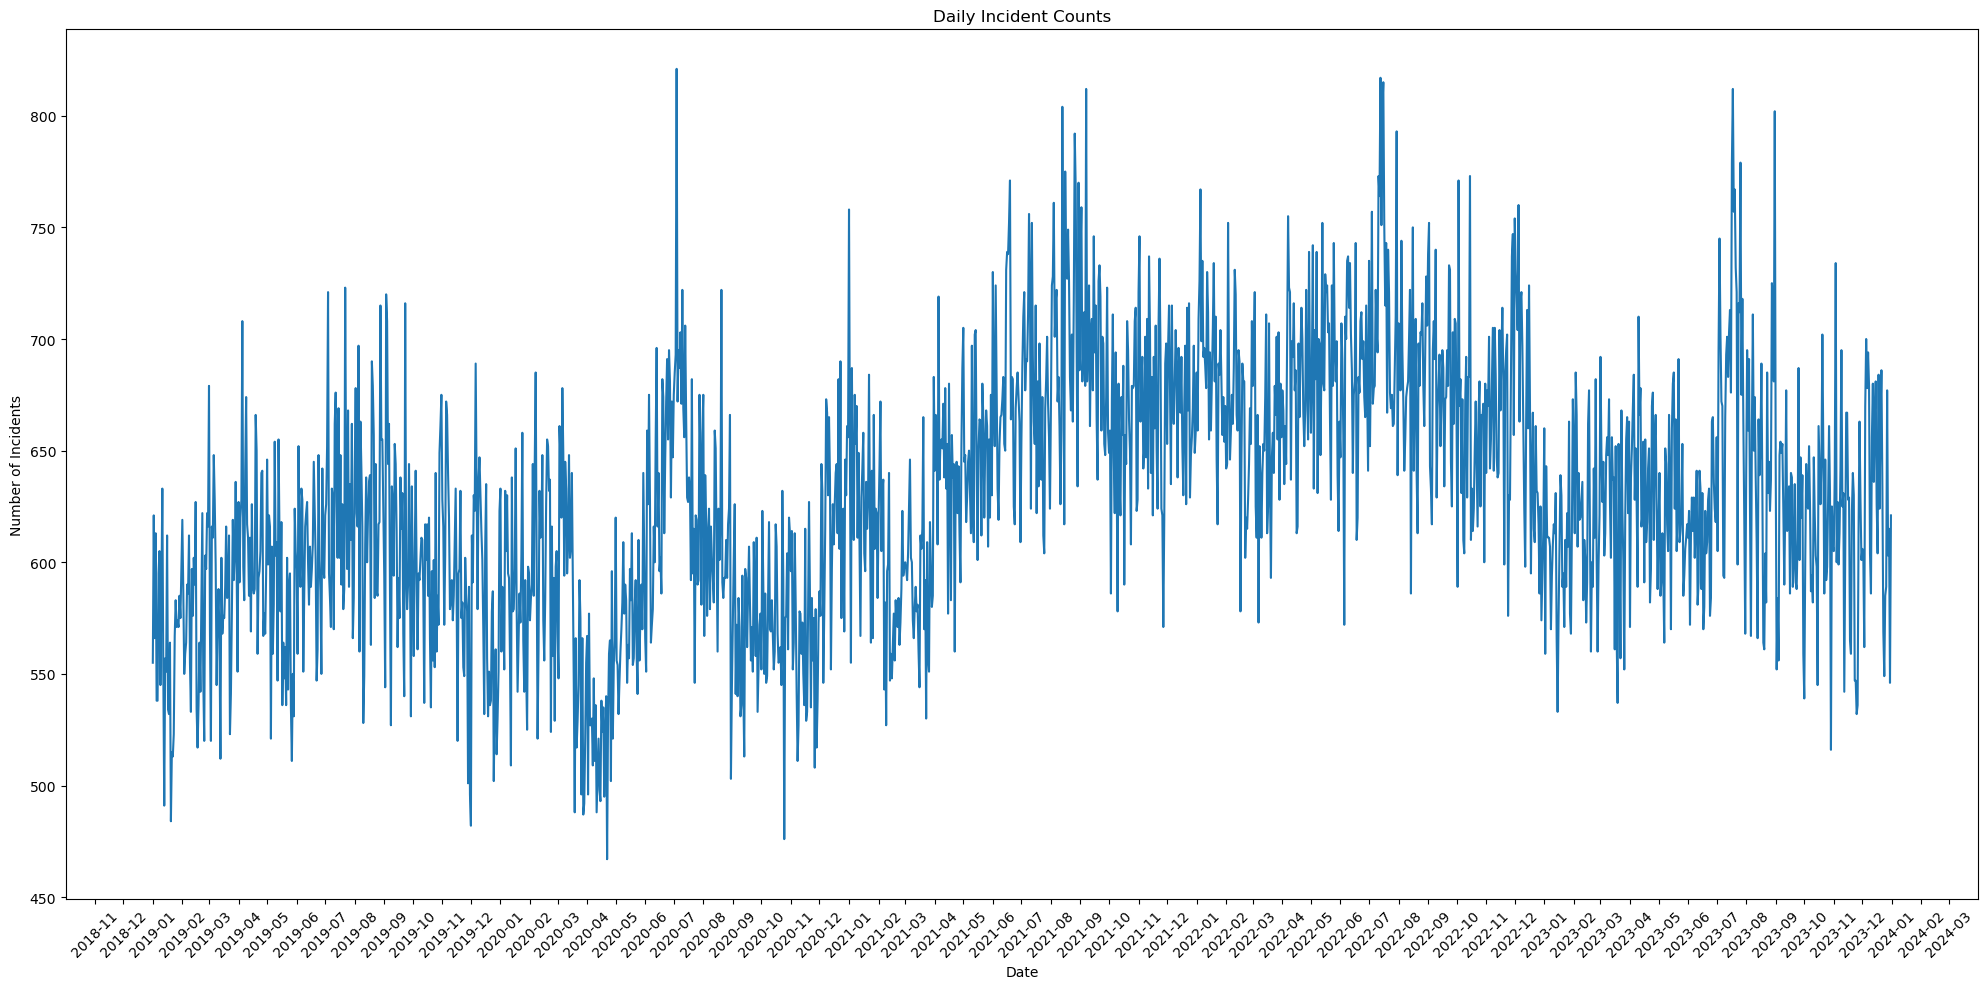

In [19]:
import matplotlib.dates as mdates

# Create the plot
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the incident counts
ax.plot(emergency_response_df_grouped['REPORTED_DATE'], emergency_response_df_grouped['COUNT'])

# Customize the plot
plt.title('Daily Incident Counts')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')

# Improve x-axis date formatting
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

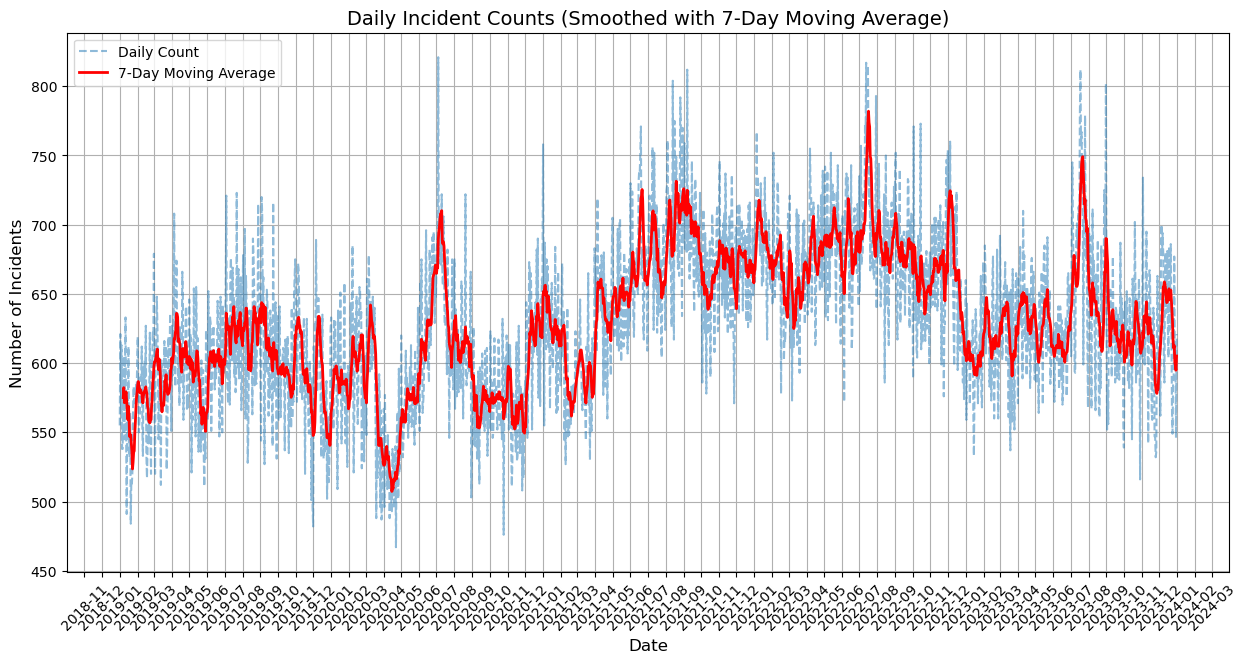

In [34]:
# Apply a 7-day moving average to smooth out fluctuations
emergency_response_df_grouped_7= emergency_response_df_grouped
emergency_response_df_grouped_7['7-day MA'] = emergency_response_df_grouped_7['COUNT'].rolling(window=7).mean()

# Create the Plot
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(emergency_response_df_grouped_7['REPORTED_DATE'], emergency_response_df_grouped_7['COUNT'], alpha=0.5, label='Daily Count', linestyle='dashed')
ax.plot(emergency_response_df_grouped_7['REPORTED_DATE'], emergency_response_df_grouped_7['7-day MA'], color='red', linewidth=2, label='7-Day Moving Average')

# Formatting
plt.title('Daily Incident Counts (Smoothed with 7-Day Moving Average)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()

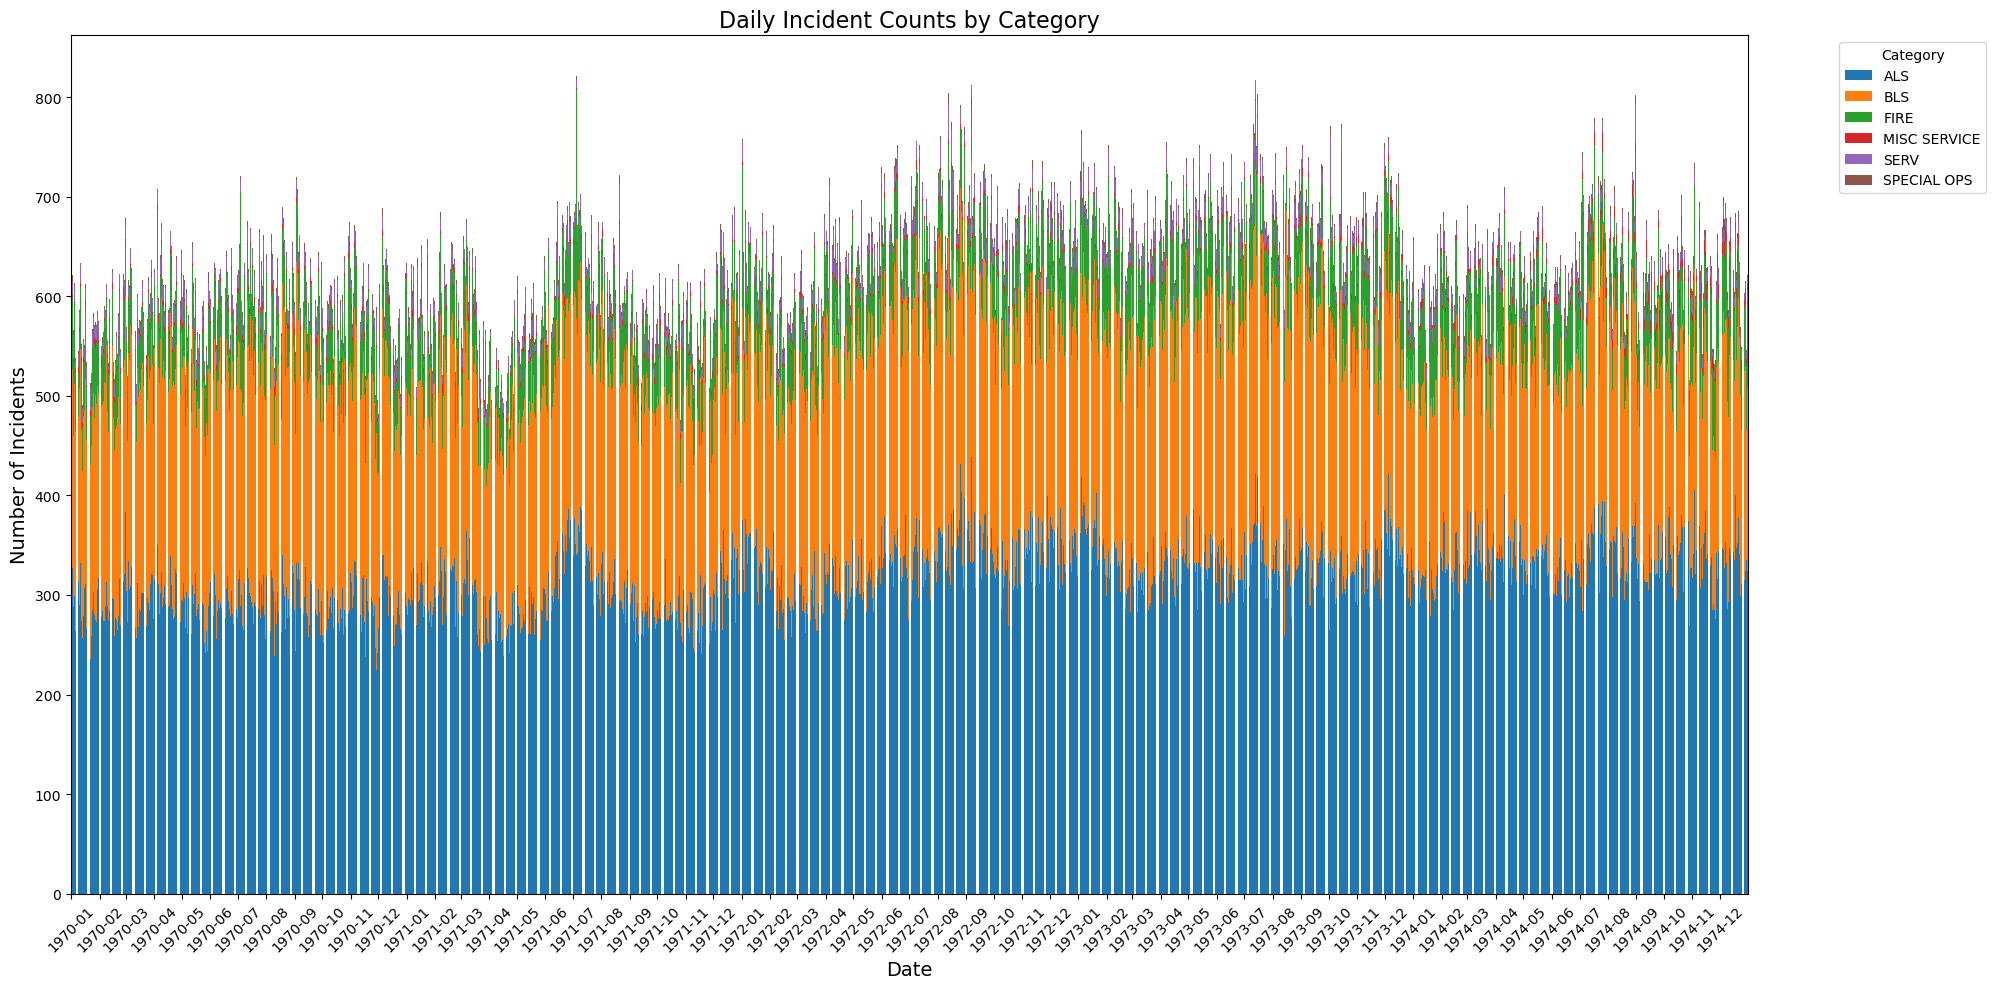

In [35]:
# Grouping based off Category call type
category_grouping = emergency_response_df.groupby(['REPORTED_DATE', 'CATEGORY']).size().unstack(fill_value=0)

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(20, 10))
category_grouping.plot(kind='bar', stacked=True, ax=ax, width=0.8)

# Reduce x-axis labels
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Plot stacked bar chart
plt.title('Daily Incident Counts by Category', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Analysis of New Moon Dataset 

In [36]:
print(len(new_moon_df))
print(new_moon_df.columns)
print(new_moon_df.dtypes)
display(new_moon_df)

61
Index(['Date ', 'Time ', 'DateTime', 'REPORTED_DATE'], dtype='object')
Date                     object
Time                     object
DateTime         datetime64[ns]
REPORTED_DATE            object
dtype: object


,Date,Time,DateTime,REPORTED_DATE
0,1/29/19,5:35,2019-01-29 05:35:00,2019-01-29
1,2/27/19,17:44,2019-02-27 17:44:00,2019-02-27
2,3/29/19,3:57,2019-03-29 03:57:00,2019-03-29
3,4/27/19,12:31,2019-04-27 12:31:00,2019-04-27
4,5/26/19,20:02,2019-05-26 20:02:00,2019-05-26
...,...,...,...,...
56,8/16/23,2:38,2023-08-16 02:38:00,2023-08-16
57,9/14/23,18:39,2023-09-14 18:39:00,2023-09-14
58,10/14/23,10:55,2023-10-14 10:55:00,2023-10-14
59,11/13/23,2:27,2023-11-13 02:27:00,2023-11-13


In [37]:
# Covert Date column to datetime64[ns]

# Total number of New Moons from 2019 - 2023 
total_newmoons = new_moon_df.shape[0]
print(f"Total Number of New Moons: {total_newmoons}")

# Assuming your dataframe is named New Moon 
## Group by date and display count of rows
new_moon_df['REPORTED_DATE'] = new_moon_df['DateTime'].dt.date
new_moon_grouped = new_moon_df.groupby('REPORTED_DATE').size().reset_index(name='COUNT') 

# Convert REPORTED_DATE back to datetime for easier plotting   
new_moon_grouped['REPORTED_DATE'] = pd.to_datetime(new_moon_grouped['REPORTED_DATE'])
(new_moon_grouped['REPORTED_DATE'])

print(len(new_moon_grouped))
display(new_moon_grouped.head(10))

new_moon_grouped.info()

Total Number of New Moons: 61
61


,REPORTED_DATE,COUNT
0,2019-01-29,1
1,2019-02-27,1
2,2019-03-29,1
3,2019-04-27,1
4,2019-05-26,1
5,2019-06-25,1
6,2019-07-24,1
7,2019-08-22,1
8,2019-09-21,1
9,2019-10-21,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   REPORTED_DATE  61 non-null     datetime64[ns]
 1   COUNT          61 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.1 KB


In [42]:

date_match = emergency_response_df_grouped[emergency_response_df_grouped['REPORTED_DATE'].isin(new_moon_grouped['REPORTED_DATE'])]

date_match.head()



,REPORTED_DATE,COUNT,7-day MA
28,2019-01-29,585,567.714286
57,2019-02-27,622,584.857143
87,2019-03-29,636,584.428571
116,2019-04-27,567,600.142857
145,2019-05-26,535,566.142857
